In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from  matplotlib.ticker import PercentFormatter

In [3]:
#Loading the data into data frame
uber = pd.read_csv(r"Uber Request Data.csv")
uber.head()

Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47

## Data Cleaning

In [4]:
#Getting all the timestamps in same format
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'],dayfirst=True)
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'],dayfirst=True)
uber.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  
0 2016-07-11 13:00:00  
1 2016-07-11 18:47:00  
2 2016-07-12 09:58:00  
3 2016-07-12 22:03:00  
4 2016-07-13 09:25:47

In [5]:
#Checking if all the completed trips have drop timestamp
uber[uber['Status']=='Trip Completed']['Drop timestamp'].isna().sum()

0

In [6]:
#Checking if all the cancelled rides have Driver ID
uber[uber['Status']=='Cancelled']['Driver id'].isna().sum()

0

In [7]:
#Getting count of each status i.e complete,cancelled,cab NA
status=uber.groupby('Status')['Request id'].count()
status

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
Name: Request id, dtype: int64

In [8]:
#Getting count of rides at each pickup point
pickup = uber.groupby('Pickup point')['Request id'].count()
pickup

Pickup point
Airport    3238
City       3507
Name: Request id, dtype: int64

Text(0.5,1,'Request count at Pickup points')

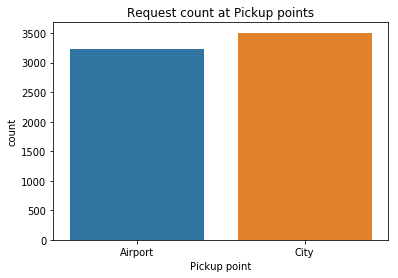

In [9]:
sx=sns.countplot(x='Pickup point',data=uber)
plt.title('Request count at Pickup points')

In [10]:
#Getting slots of booking and adding column slot and request hour
uber['Request Hour'] = uber['Request timestamp'].dt.hour
uber=uber.assign(slot=pd.cut(uber['Request timestamp'].dt.hour,[-1,4,9,14,19,23],labels=['Night','Early Morning','Morning','Afternoon','Evening']))
uber.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  Request Hour           slot  
0 2016-07-11 13:00:00            11        Morning  
1 2016-07-11 18:47:00            17      Afternoon  
2 2016-07-12 09:58:00             9  Early Morning  
3 2016-07-12 22:03:00            21        Evening  
4 2016-07-13 09:25:47             8  Early Morning

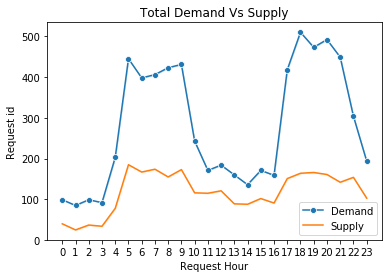

In [11]:
#Demand vs Supply graph
a=uber.groupby('Request Hour')['Request id'].transform('count')
b=uber[uber['Status']=='Trip Completed'].groupby('Request Hour')['Request id'].transform('count')
h=np.arange(0,24,step=1)
plt.xticks(h)
plt.title("Total Demand Vs Supply")
sx=sns.lineplot(x='Request Hour',y=a,data=uber,marker='o',label="Demand")
yx=sns.lineplot(x='Request Hour',y=b,data=uber, label="Supply")
#Shows 2 bumps during 5am-9am and 5pm to 10pm

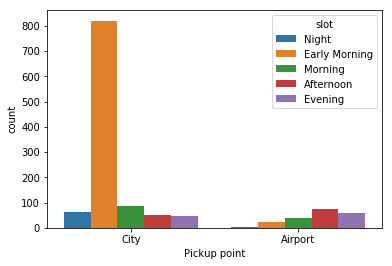

In [12]:
#Getting count of slot wise cancellation for each pickup point
fx=sns.countplot(x='Pickup point',hue='slot',data=uber[uber.Status=='Cancelled'])
#Shows most of the cancellations were from city and during midnight i.e 5am to 9am

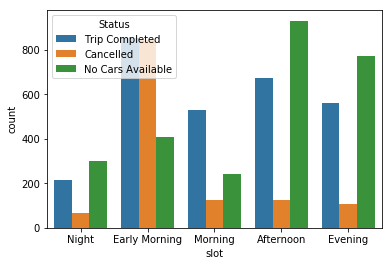

In [13]:
#Slot-wise trip status
fx=sns.countplot(x='slot',hue='Status',data=uber)
#Huge count of cancellations in Early morning and Cab availablity in Afternoon,Evening

In [14]:
#Getting Week Day of booking 
uber['Booking Day'] = uber['Request timestamp'].dt.weekday_name
#Getting count of bookings on each day
uber.groupby('Booking Day')['Request id'].count()
#Getting count of cancelled rides on each day
uber.groupby(['Status','Booking Day'])['Request id'].count()

Status             Booking Day
Cancelled          Friday         240
                   Monday         262
                   Thursday       252
                   Tuesday        240
                   Wednesday      270
No Cars Available  Friday         580
                   Monday         504
                   Thursday       571
                   Tuesday        505
                   Wednesday      490
Trip Completed     Friday         561
                   Monday         601
                   Thursday       530
                   Tuesday        562
                   Wednesday      577
Name: Request id, dtype: int64

Text(0.5,0.98,'Day-wise Trip Status for Pickup points')

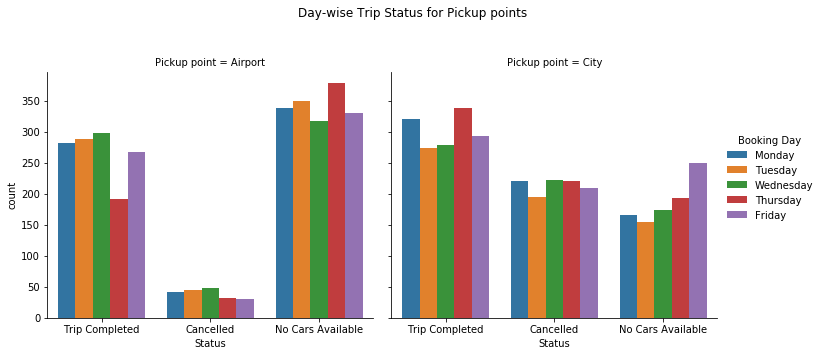

In [15]:
#Day-wise trip status
bx=sns.catplot(x='Status',hue='Booking Day',col='Pickup point',data=uber,kind="count")
plt.subplots_adjust(top=.8)
bx.fig.suptitle('Day-wise Trip Status for Pickup points')

In [16]:
#Getting journey duration from pickup to drop point
uber['Journey time'] = (uber['Drop timestamp'] - uber['Request timestamp'])
uber['Journey time'].mean()
#Average journey time is around 53 minutes (~ 1 hour)
uber.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  Request Hour           slot Booking Day Journey time  
0 2016-07-11 13:00:00            11        Morning      Monday     01:09:00  
1 2016-07-11 18:47:00            17      Afternoon      Monday     00:50:00  
2 2016-07-12 09:58:00             9  Early Morning     Tuesday     00:41:00  
3 2016-07-12 22:03:00            21        Evening     Tuesday     00:55:00  
4 2016-07-13 09:25:47             8  Early Morning   Wednesday     00:52:31

In [17]:
#Getting driver info who took less time to travel from city to airport
uber[uber['Journey time']==uber['Journey time'].min()]
#Got 237.0 as driver id
#Enquiring more about that driver to check for rash driving
uber[uber['Driver id']==237.0]['Journey time']
#Seems that was just one time that he drove so fast-->maybe less traffic

2266   00:55:00
2267   00:39:00
2268   01:16:00
2269   00:58:00
2270   00:46:00
2271   00:53:56
2272   00:45:39
2273   00:56:08
2274   00:20:47
2275   01:12:34
2276   01:16:15
3829        NaT
3830        NaT
3831        NaT
3832        NaT
3833        NaT
Name: Journey time, dtype: timedelta64[ns]

Text(0.5,1,'Request Status at Pickup points')

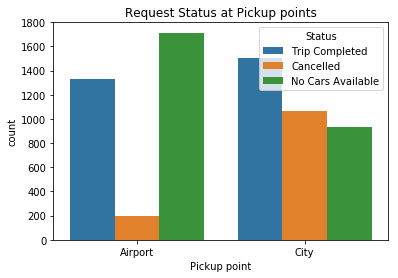

In [18]:
#Status for different pickup points
fx=sns.countplot(x='Pickup point',hue='Status',data=uber)
plt.title('Request Status at Pickup points')
#Shows at Airport most pressing problem is unavailability of cars
#Shows at City most pressing problem is cancellation of rides

Text(0.5,0.98,'Slotwise Ride Status for Pickup points')

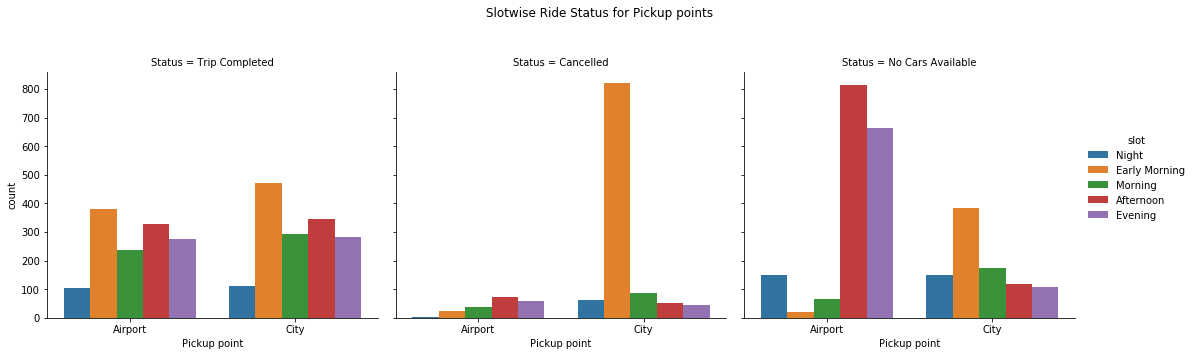

In [19]:
#Getting count of slot wise cancellation for each pickup point
fx=sns.catplot(x='Pickup point',hue='slot',data=uber,col='Status',kind="count")
plt.subplots_adjust(top=.8)
fx.fig.suptitle('Slotwise Ride Status for Pickup points')
#Shows most of the cancellations were from city and during early morning i.e 5am to 9am

In [20]:
#New dataframe for rides from Airport
uber_airport = uber[uber['Pickup point']=='Airport']
uber_airport.drop('Pickup point',axis=1)
uber_airport.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
5        3879      Airport        1.0  Trip Completed 2016-07-13 21:57:28   
6        4270      Airport        1.0  Trip Completed 2016-07-14 06:15:32   

       Drop timestamp  Request Hour           slot Booking Day Journey time  
0 2016-07-11 13:00:00            11        Morning      Monday     01:09:00  
1 2016-07-11 18:47:00            17      Afternoon      Monday     00:50:00  
3 2016-07-12 22:03:00            21        Evening     Tuesday     00:55:00  
5 2016-07-13 22:28:59            21        Evening   Wednesday     00:31:31  
6 2016-07-14 07:13:15             6  Early Morning    Thursday     00:57:43

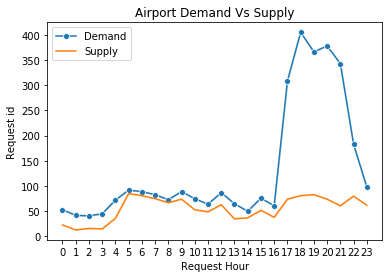

In [21]:
#Demand vs Supply graph for Airport to city trips
a=uber_airport.groupby('Request Hour')['Request id'].transform('count')
b=uber_airport[uber_airport.Status=='Trip Completed'].groupby('Request Hour')['Request id'].transform('count')
plt.xticks(h)
plt.title('Airport Demand Vs Supply')
sx=sns.lineplot(x='Request Hour',y=a,data=uber_airport,marker='o',label="Demand")
px=sns.lineplot(x='Request Hour',y=b,data=uber_airport,label="Supply")

Text(0.5,0.98,'Airport Hour-wise ride status')

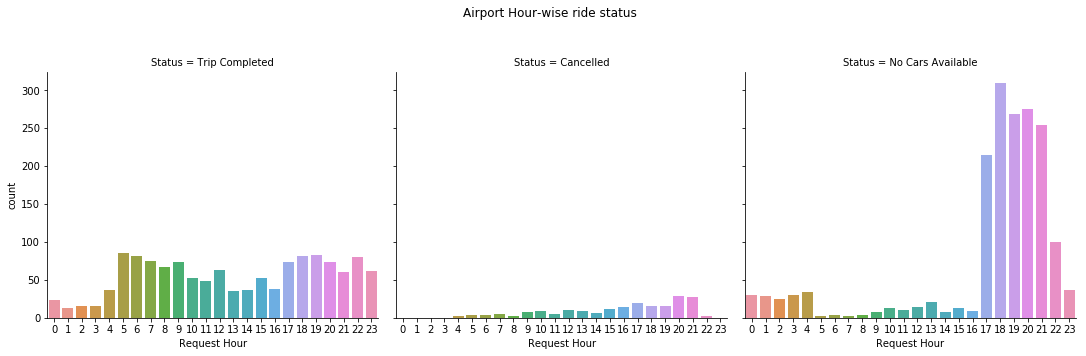

In [22]:
#Airport Hour-wise ride status count 
cx=sns.catplot(x='Request Hour',data=uber_airport,col='Status',kind="count")
plt.subplots_adjust(top=.8)
cx.fig.suptitle('Airport Hour-wise ride status')
#Gives pressing factor as cars unavailability during afternoon and evenings

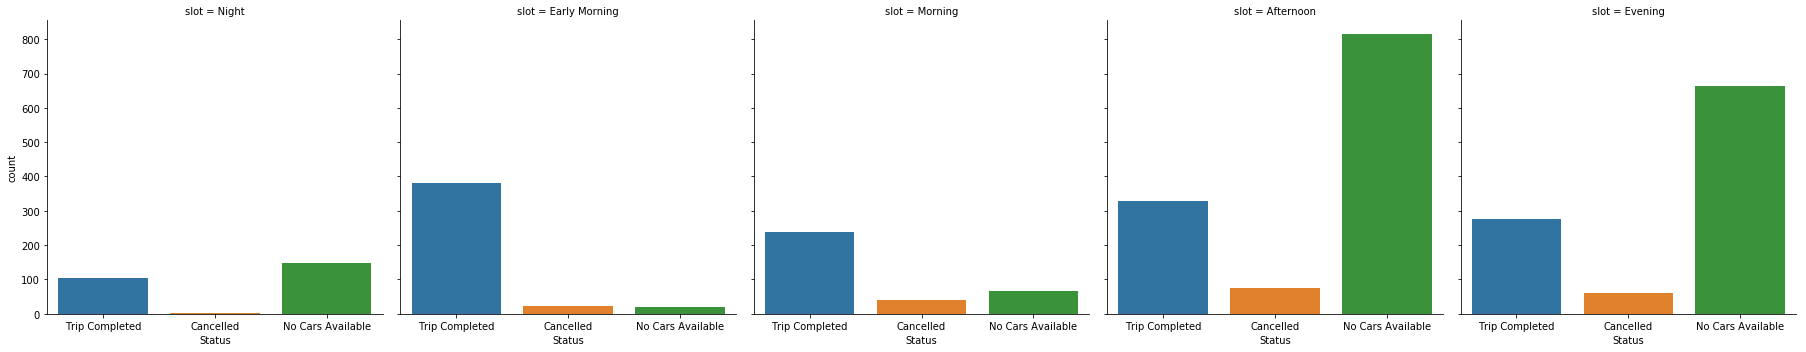

In [23]:
#Airport Ride staus slotwise
gx=sns.catplot(x='Status',data=uber_airport,col='slot',kind="count")

In [24]:
#New dataframe for rides from City
uber_city = uber[uber['Pickup point']=='City']
uber_city.drop('Pickup point',axis=1)
uber_city.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
2         1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
4         3112         City        1.0  Trip Completed 2016-07-13 08:33:16   
8         6248         City        1.0  Trip Completed 2016-07-15 17:57:27   
9          267         City        2.0  Trip Completed 2016-07-11 06:46:00   
11        1983         City        2.0  Trip Completed 2016-07-12 12:30:00   

        Drop timestamp  Request Hour           slot Booking Day Journey time  
2  2016-07-12 09:58:00             9  Early Morning     Tuesday     00:41:00  
4  2016-07-13 09:25:47             8  Early Morning   Wednesday     00:52:31  
8  2016-07-15 18:50:51            17      Afternoon      Friday     00:53:24  
9  2016-07-11 07:25:00             6  Early Morning      Monday     00:39:00  
11 2016-07-12 12:57:00            12        Morning     Tuesday     00:27:00

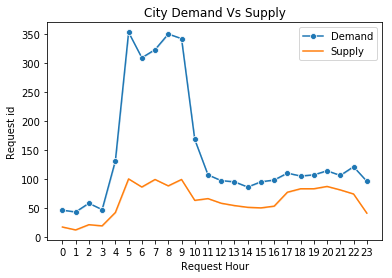

In [25]:
#Demand vs Supply graph for City to Airport trips
a=uber_city.groupby('Request Hour')['Request id'].transform('count')
b=uber_city[uber_city.Status=='Trip Completed'].groupby('Request Hour')['Request id'].transform('count')
plt.xticks(h)
plt.title('City Demand Vs Supply')
sx=sns.lineplot(x='Request Hour',y=a,data=uber_city,marker='o',label="Demand")
px=sns.lineplot(x='Request Hour',y=b,data=uber_city,label="Supply")

Text(0.5,0.98,'City Hour-wise ride status')

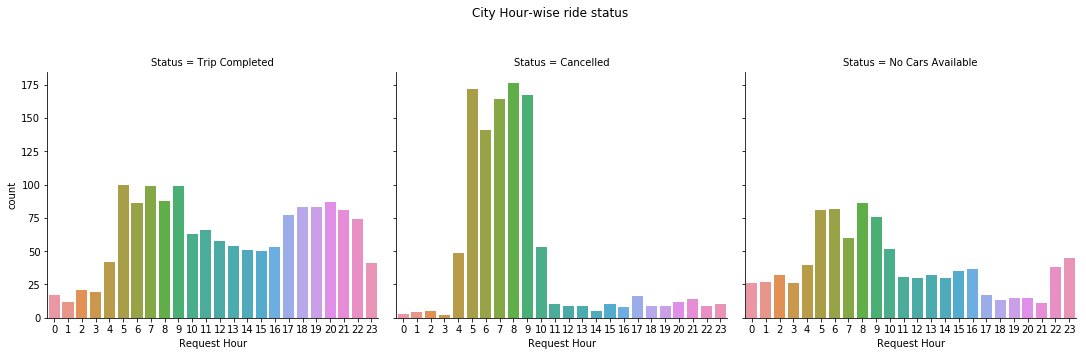

In [26]:
#City Hour-wise ride status count from City to Airport
cx=sns.catplot(x='Request Hour',data=uber_city,col='Status',kind="count")
plt.subplots_adjust(top=.8)
cx.fig.suptitle('City Hour-wise ride status')
#Gives pressing factor as cancelled during early morning

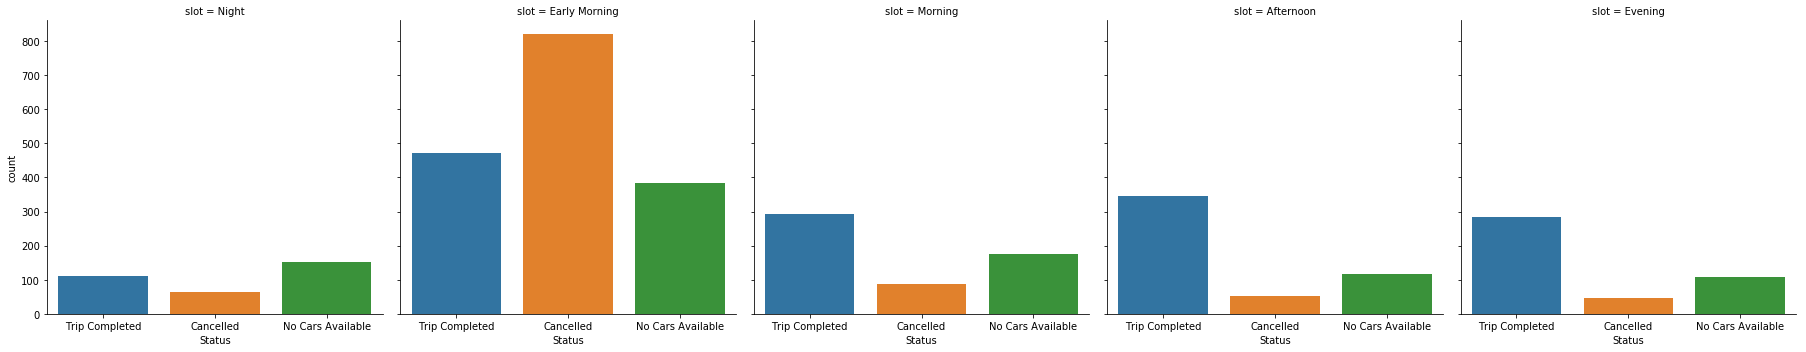

In [27]:
#City Ride status slotwise
fx=sns.catplot(x='Status',data=uber_city,col='slot',kind="count")

In [28]:
#Trips cancelled time
uber[uber['Status']=='Cancelled']['Request timestamp'].dt.hour.mode()[0]
#Mostly trips got cancelled around 8 am morning

8

In [29]:
#Getting count of requests cancelled by drivers
rides_cancelled=uber[uber['Status']=='Cancelled'].groupby('Driver id')['Request id'].count()
rides_cancelled.mean()
#On an average almost 4 rides are cancelled by each driver (some exceptions)

4.284745762711864

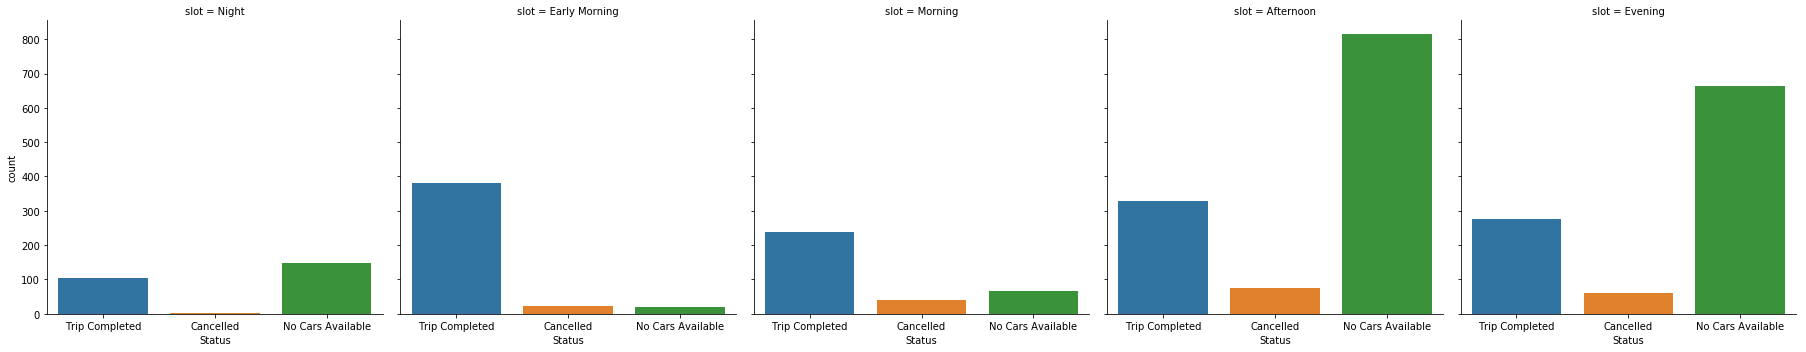

In [30]:
#Airport Ride status slotwise
gx=sns.catplot(x='Status',data=uber[uber['Pickup point']=='Airport'],col='slot',kind="count")